****IMPORTING LIBRARIES****

In [61]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

**Importing Data**

In [62]:
#imported data
rain=pd.read_csv(r'C:\Users\muzam\OneDrive\Desktop\RainFall Prediction\weatherAUS.csv')

**Cleaning Data**

In [63]:
x = rain.iloc[:,[1,2,3,4,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,]].values
y = rain.iloc[:,[-1]].values
y = y.reshape(-1,1)

In [64]:
y = y.reshape(-1,1)

In [65]:
imputer =  SimpleImputer(missing_values=np.nan, strategy='most_frequent')
#here the simple imputer function is taking two variable one is missing values 
# it wants to replace and the statergy like in this function the np.nan values 
# will be replaced by most frequent value in the column

In [66]:
x= imputer.fit_transform(x)
y= imputer.fit_transform(y)

In [67]:
y 

array([['No'],
       ['No'],
       ['No'],
       ...,
       ['No'],
       ['No'],
       ['No']], dtype=object)

**Encoding The Data**

In [68]:
le1 = LabelEncoder()
le2 = LabelEncoder()
le3 = LabelEncoder()
le4 = LabelEncoder()
le5 = LabelEncoder()
le6 = LabelEncoder()

x[:,0] = le1.fit_transform(x[:,0])
x[:,4] = le2.fit_transform(x[:,4])
x[:,6] = le3.fit_transform(x[:,6])
x[:,7] = le4.fit_transform(x[:,7])
x[:,-1] = le5.fit_transform(x[:,5])
y= le6.fit_transform(y)


c:\Users\muzam\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**Scaling The Data Between +3 and -3**

In [69]:
stdscl = StandardScaler()
x  = stdscl.fit_transform(x)

**Spliting the data for training and testing**

In [70]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)


In [71]:
y_train

array([1, 0, 0, ..., 0, 0, 0])

**training the random forest classifier**

In [72]:
classfier = RandomForestClassifier(n_estimators=100, random_state=0)
classfier.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

**Checking The Accuracy Score of the reading model**

In [73]:
classfier.score(x_train,y_train)

0.9999226591502819

**Predicting The Rain**

In [74]:
y_pred = classfier.predict(x_test)

**Decoding the encoded model Using le6 Label Encoder**

In [75]:
y_pred = le6.inverse_transform(y_pred)

In [76]:
y_test = le6.inverse_transform(y_test)

In [77]:
print(y_test)

['Yes' 'Yes' 'No' ... 'Yes' 'No' 'No']


**Reshaping the Prediction and dependent variable column**

In [78]:
y_test = y_test.reshape(-1, 1)
y_pred = y_pred.reshape(-1, 1)

**Concating the column**

In [79]:
rain_frame = np.concatenate((y_test, y_pred), axis=1)

In [80]:
rain = pd.DataFrame(rain_frame,columns= ['Rain TMRW','PRED RAIN'])

**displaying The Data Prediction**

In [81]:
rain

,Rain TMRW,PRED RAIN
0,Yes,No
1,Yes,No
2,No,No
3,No,Yes
4,No,No
...,...,...
29087,No,Yes
29088,No,No
29089,Yes,No
29090,No,No


**Saving The CSV FILE**

In [82]:
rain.to_csv('Prediction.csv', )

**Finding The Predictoion Accuracy**

In [83]:
accu = accuracy_score(y_test, y_pred)

**Printing the Model Accuracy**

In [84]:
print('The accuracy Of The Model is: ', accu*100, '%')

The accuracy Of The Model is:  85.41179705761034 %


**Ploting the data predictions**

Index(['Unnamed: 0', 'Rain TMRW', 'PRED RAIN'], dtype='object')


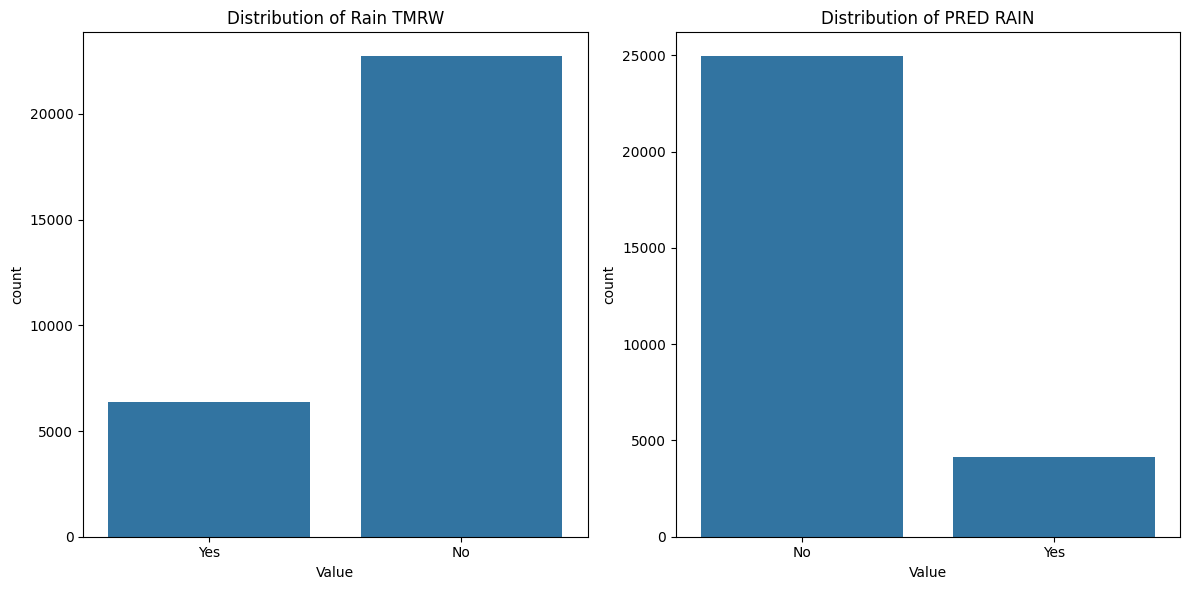

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
file_path = r'C:\Users\muzam\OneDrive\Desktop\RainFall Prediction\Prediction.csv'
df = pd.read_csv(file_path)
print(df.columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.countplot(x='Rain TMRW', data=df, ax=axes[0])
sns.countplot(x='PRED RAIN', data=df, ax=axes[1])
axes[0].set_title('Distribution of Rain TMRW')
axes[0].set_xlabel('Value')
axes[1].set_title('Distribution of PRED RAIN')
axes[1].set_xlabel('Value')
plt.tight_layout()
plt.show()
